<a href="https://colab.research.google.com/github/rosipapa/colab/blob/main/titanic_kaggle_2023_ok.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Titanic Survived - Kaggle

The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

https://www.kaggle.com/c/titanic/overview

# Download dataset

In [1]:
# Upload json with access key to kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"rosipapa","key":"9ffd59b4c9238aed2c5d4ee0e33d9231"}'}

In [2]:
! pip install kaggle==1.5.6
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [3]:
# create a directory to save files
! mkdir dataset

mkdir: cannot create directory ‘dataset’: File exists


In [4]:
# Download data file
! kaggle competitions download -c titanic -p '/content/dataset'

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
# Unzip files
! unzip '/content/dataset/titanic.zip' -d '/content/dataset'

Archive:  /content/dataset/titanic.zip
replace /content/dataset/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dataset/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace /content/dataset/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


# Read train file

In [6]:
import pandas as pd
import sklearn
import pandas_profiling
import os

<ipython-input-6-a253819c0874>:3: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling


In [7]:
# Read train file
df = pd.read_csv("/content/dataset/train.csv")

In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


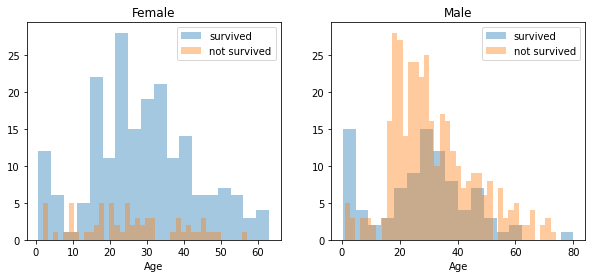

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

survived = 'survived'
not_survived = 'not survived'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
women = df[df['Sex']=='female']
men = df[df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False)
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False)
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False)
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False)
ax.legend()
_ = ax.set_title('Male')

# Data report with Pandas Profiling

In [229]:
#need restart runtime after installation
!pip install -U pandas-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 35.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 112.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 57.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 108.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 26.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=a323e9d973df8d28b5b37ba7e106531e8e116fb07a3283b22536b8e7f0f91b18
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attemp

In [14]:
#import pandas_profiling
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

profile = ProfileReport(df)


In [15]:
print(repr(profile.report))

profile.to_widgets()

profile.to_file("titanic_kaggle_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Root


/usr/local/lib/python3.8/dist-packages/pandas_profiling/profile_report.py:457: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Data treatment for train file

In [232]:
#Extract Cabin first letter
df['Cabin'] = df.Cabin.apply(lambda x: str(x)[0])

In [233]:
df['Cabin']

0      n
1      C
2      n
3      C
4      n
      ..
886    n
887    B
888    n
889    C
890    n
Name: Cabin, Length: 891, dtype: object

In [234]:
print(df.Cabin.value_counts())

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [235]:
#Extract Name titlle
df['Name'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [236]:
df['Name'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Name, dtype: int64

In [237]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.0,1,0,A/5 21171,7.2500,n,S
1,2,1,1,Mrs,female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,Miss,female,26.0,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,Mrs,female,35.0,1,0,113803,53.1000,C,S
4,5,0,3,Mr,male,35.0,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.0,0,0,211536,13.0000,n,S
887,888,1,1,Miss,female,19.0,0,0,112053,30.0000,B,S
888,889,0,3,Miss,female,NaN,1,2,W./C. 6607,23.4500,n,S
889,890,1,1,Mr,male,26.0,0,0,111369,30.0000,C,C


In [238]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [239]:
# Check null elemtents 
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64

In [240]:
# Fill null with mean  
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

In [241]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [231]:
df['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [242]:
#df['Embarked'] = df['Embarked'].fillna("C")
df['Embarked'] = df['Embarked'].fillna("C")

In [243]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,Mr,male,22.000000,1,0,A/5 21171,7.2500,n,S
1,2,1,1,Mrs,female,38.000000,1,0,PC 17599,71.2833,C,C
2,3,1,3,Miss,female,26.000000,0,0,STON/O2. 3101282,7.9250,n,S
3,4,1,1,Mrs,female,35.000000,1,0,113803,53.1000,C,S
4,5,0,3,Mr,male,35.000000,0,0,373450,8.0500,n,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,Rev,male,27.000000,0,0,211536,13.0000,n,S
887,888,1,1,Miss,female,19.000000,0,0,112053,30.0000,B,S
888,889,0,3,Miss,female,29.699118,1,2,W./C. 6607,23.4500,n,S
889,890,1,1,Mr,male,26.000000,0,0,111369,30.0000,C,C


In [244]:
# Get dummies for category variable
df = pd.get_dummies(df)
y = df.Survived
x = df.drop(columns ="Survived")
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Name_Capt,Name_Col,Name_Don,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.000000,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,1,38.000000,1,0,71.2833,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,1,3,26.000000,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,1,35.000000,1,0,53.1000,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,0,3,35.000000,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,888,1,1,19.000000,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,29.699118,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,1,0,0,1
889,890,1,1,26.000000,0,0,30.0000,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [245]:
#Check correlation between some variables
print('Corr Survided and Fare',df['Survived'].corr(df['Fare']))
print('Corr Survided and Name_Master',df['Survived'].corr(df['Name_Master']))
print('Corr Survided and Age',df['Survived'].corr(df['Age']))
print('Corr Survided and Sex_female',df['Survived'].corr(df['Sex_female']))
print('Corr Survided and Sex_male',df['Survived'].corr(df['Sex_male']))

Corr Survided and Fare 0.2573065223849625
Corr Survided and Name_Master 0.08522056083929426
Corr Survided and Age -0.06980851528714314
Corr Survided and Sex_female 0.5433513806577555
Corr Survided and Sex_male -0.5433513806577555


In [246]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [247]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name_Capt,Name_Col,Name_Don,Name_Dr,...,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,3,3,26.000000,0,0,7.9250,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,3,29.699118,1,2,23.4500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.0000,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


# Read and data treatment for test file

In [249]:
# Read file test
df_test = pd.read_csv("/content/dataset/test.csv")
df_test
# Fill null fields
#df_test['Embarked'] = df_test['Embarked'].fillna("C")
df_test['Embarked'] = df_test['Embarked'].fillna("S")
df_test['Age'].fillna(value=df_test['Age'].mean(), inplace=True)
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,NaN,S


In [250]:
df_test.isnull().sum()
df_test['Fare'].fillna(value=df_test['Fare'].mean(), inplace=True)  
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [251]:
df_test['Name'] = df_test.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [252]:
df_test['Cabin'] = df_test.Cabin.apply(lambda x: str(x)[0])

In [253]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,Mr,male,34.50000,0,0,330911,7.8292,n,Q
1,893,3,Mrs,female,47.00000,1,0,363272,7.0000,n,S
2,894,2,Mr,male,62.00000,0,0,240276,9.6875,n,Q
3,895,3,Mr,male,27.00000,0,0,315154,8.6625,n,S
4,896,3,Mrs,female,22.00000,1,1,3101298,12.2875,n,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,Mr,male,30.27259,0,0,A.5. 3236,8.0500,n,S
414,1306,1,Dona,female,39.00000,0,0,PC 17758,108.9000,C,C
415,1307,3,Mr,male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,n,S
416,1308,3,Mr,male,30.27259,0,0,359309,8.0500,n,S


In [254]:
df_test = pd.get_dummies(df_test)

In [255]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name_Col,Name_Dona,Name_Dr,Name_Master,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,894,2,62.00000,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [256]:
# Check number of columns from train and test 
my_list_x = list(x)
print ('Arquivo de treino',my_list_x)
my_list_test = list(df_test)
print ('Arquivo de teste',my_list_test)

Arquivo de treino ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Capt', 'Name_Col', 'Name_Don', 'Name_Dr', 'Name_Jonkheer', 'Name_Lady', 'Name_Major', 'Name_Master', 'Name_Miss', 'Name_Mlle', 'Name_Mme', 'Name_Mr', 'Name_Mrs', 'Name_Ms', 'Name_Rev', 'Name_Sir', 'Name_the Countess', 'Sex_female', 'Sex_male', 'Ticket_110152', 'Ticket_110413', 'Ticket_110465', 'Ticket_110564', 'Ticket_110813', 'Ticket_111240', 'Ticket_111320', 'Ticket_111361', 'Ticket_111369', 'Ticket_111426', 'Ticket_111427', 'Ticket_111428', 'Ticket_112050', 'Ticket_112052', 'Ticket_112053', 'Ticket_112058', 'Ticket_112059', 'Ticket_112277', 'Ticket_112379', 'Ticket_113028', 'Ticket_113043', 'Ticket_113050', 'Ticket_113051', 'Ticket_113055', 'Ticket_113056', 'Ticket_113059', 'Ticket_113501', 'Ticket_113503', 'Ticket_113505', 'Ticket_113509', 'Ticket_113510', 'Ticket_113514', 'Ticket_113572', 'Ticket_113760', 'Ticket_113767', 'Ticket_113773', 'Ticket_113776', 'Ticket_113781', 'Ticket_113783', 'Ticket_11

In [257]:
# Intersection of columns in both dataset (train and test)
x = x[x.columns.intersection(my_list_test)]

In [187]:
x

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name_Col,Name_Dr,Name_Master,Name_Miss,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,1,3,22.000000,1,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,2,1,38.000000,1,0,71.2833,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,3,3,26.000000,0,0,7.9250,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,4,1,35.000000,1,0,53.1000,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,5,3,35.000000,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.000000,0,0,13.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
887,888,1,19.000000,0,0,30.0000,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
888,889,3,29.699118,1,2,23.4500,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
889,890,1,26.000000,0,0,30.0000,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [258]:
# Intersection of columns in both dataset (train and test)
df_test = df_test[df_test.columns.intersection(my_list_x)]

In [189]:
df_test

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Name_Col,Name_Dr,Name_Master,Name_Miss,...,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_n,Embarked_C,Embarked_Q,Embarked_S
0,892,3,34.50000,0,0,7.8292,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,893,3,47.00000,1,0,7.0000,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,894,2,62.00000,0,0,9.6875,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,895,3,27.00000,0,0,8.6625,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,896,3,22.00000,1,1,12.2875,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
414,1306,1,39.00000,0,0,108.9000,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
415,1307,3,38.50000,0,0,7.2500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
416,1308,3,30.27259,0,0,8.0500,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [259]:
#split in train and validation
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x,y,test_size=0.3,random_state=42)

# Random forest

In [197]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
random_forest = RandomForestClassifier(n_estimators=500, criterion='entropy')
random_forest.fit(x_train, y_train)
random_forest_preds = random_forest.predict(x_val)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_val))

The accuracy of the Random Forests model is :	 0.7947761194029851


In [198]:
random_forest_preds

array([1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0])

In [199]:
random_forest_preds = random_forest.predict(df_test)

In [200]:
# random forest submission to Kaggle - create dataframe
df_result =[]
df_result = pd.DataFrame(columns = ['PassengerId','Survived'])
df_result.PassengerId = df_test.PassengerId
df_result.Survived = random_forest_preds
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [201]:
# random forest submission to Kaggle - write file
#Submission File Format:
#You should submit a csv file with exactly 418 entries plus a header row. 
#Your submission will show an error if you have extra columns 
#(beyond PassengerId and Survived) or rows.
#The file should have exactly 2 columns:
#PassengerId (sorted in any order)
#Survived (contains your binary predictions: 1 for survived, 0 for deceased)

df_result.to_csv (r'/content/titanic_rf_2023.csv', index = False, header=True)
print (df_result)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]


# Shap to explain Random Forest

In [213]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 38.1 MB/s eta 0:00:00


In [214]:
import shap
explainer = shap.TreeExplainer(random_forest)

In [215]:
# Calculate Shap values
choosen_instance = df_test.loc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

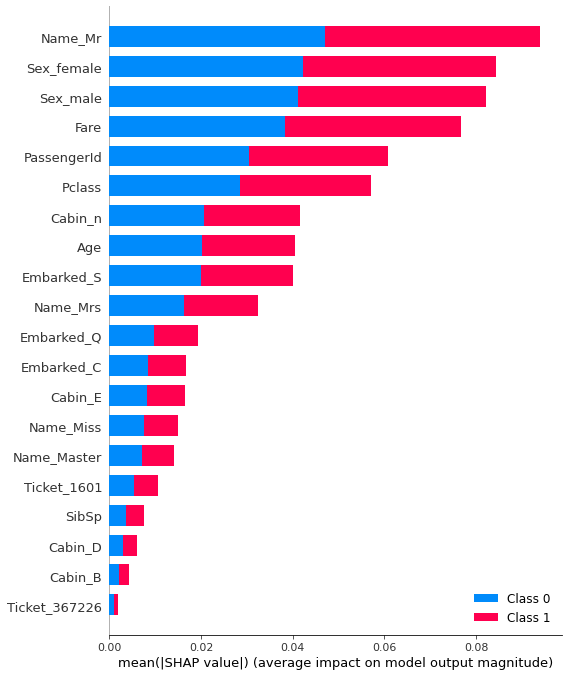

In [216]:
shap.summary_plot(shap_values, df_test)

# XGBoost

In [202]:
import xgboost as xgb
xgb = xgb.XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier()

In [203]:
xgb_score = xgb.score(x_val, y_val)
accuracies = []
accuracies.append(xgb_score)
print(xgb_score)

0.8171641791044776


In [204]:
xgb_result = xgb.predict(df_test)

In [205]:
xgb_result

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [206]:
# XGBoost submission to Kaggle - create dataframe
df_result =[]
df_result = pd.DataFrame(columns = ['PassengerId','Survived'])
df_result.PassengerId = df_test.PassengerId
df_result.Survived = xgb_result
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [207]:
# XGBoost submission to Kaggle - write file
#Submission File Format:
#You should submit a csv file with exactly 418 entries plus a header row. 
#Your submission will show an error if you have extra columns 
#(beyond PassengerId and Survived) or rows.
#The file should have exactly 2 columns:
#PassengerId (sorted in any order)
#Survived (contains your binary predictions: 1 for survived, 0 for deceased)

df_result.to_csv (r'/content/titanic_xgb_2023.csv', index = False, header=True)
print (df_result)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


# CatBoost

In [151]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 19.9 MB/s eta 0:00:00


In [191]:
from catboost import CatBoostClassifier

In [260]:
# baseline cat boost
cat = CatBoostClassifier(iterations=1000,task_type="GPU",verbose=False)
#start_time = time.time()

cat.fit(x_train, y_train)
#print("CATBoost %s seconds" % (time.time() - start_time))

In [261]:
cat_result = cat.predict(df_test)

In [262]:
cat_result

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [263]:
# XGBoost submission to Kaggle - create dataframe
df_result =[]
df_result = pd.DataFrame(columns = ['PassengerId','Survived'])
df_result.PassengerId = df_test.PassengerId
df_result.Survived = cat_result
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [264]:
# XGBoost submission to Kaggle - write file
#Submission File Format:
#You should submit a csv file with exactly 418 entries plus a header row. 
#Your submission will show an error if you have extra columns 
#(beyond PassengerId and Survived) or rows.
#The file should have exactly 2 columns:
#PassengerId (sorted in any order)
#Survived (contains your binary predictions: 1 for survived, 0 for deceased)

df_result.to_csv (r'/content/titanic_cat_2023_v1.csv', index = False, header=True)
print (df_result)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


# Catboost V2 GridSearchCV

In [208]:
#Instantiate CatBoostClassifier
cbc = CatBoostClassifier()
from sklearn.model_selection import GridSearchCV

#create the grid
grid = {'max_depth': [3,4,5],'n_estimators':[100, 200, 300]}

#Instantiate GridSearchCV
gscv = GridSearchCV (estimator = cbc, param_grid = grid, scoring ='accuracy', cv = 5)

#fit the model
gscv.fit(x_train,y_train)

#returns the estimator with the best performance
print(gscv.best_estimator_)

#returns the best score
print(gscv.best_score_)

#returns the best parameters
print(gscv.best_params_)

A saída de streaming foi truncada nas últimas 5000 linhas.
125:	learn: 0.3486991	total: 118ms	remaining: 69.6ms
126:	learn: 0.3482242	total: 119ms	remaining: 68.7ms
127:	learn: 0.3480138	total: 120ms	remaining: 67.7ms
128:	learn: 0.3469947	total: 121ms	remaining: 66.8ms
129:	learn: 0.3467183	total: 122ms	remaining: 65.9ms
130:	learn: 0.3465465	total: 123ms	remaining: 65ms
131:	learn: 0.3463287	total: 124ms	remaining: 64.1ms
132:	learn: 0.3457201	total: 125ms	remaining: 63ms
133:	learn: 0.3450848	total: 126ms	remaining: 62.1ms
134:	learn: 0.3448710	total: 127ms	remaining: 61.2ms
135:	learn: 0.3441837	total: 128ms	remaining: 60.3ms
136:	learn: 0.3437520	total: 129ms	remaining: 59.3ms
137:	learn: 0.3431280	total: 130ms	remaining: 58.3ms
138:	learn: 0.3428983	total: 131ms	remaining: 57.4ms
139:	learn: 0.3427160	total: 132ms	remaining: 56.4ms
140:	learn: 0.3425548	total: 133ms	remaining: 55.5ms
141:	learn: 0.3423085	total: 133ms	remaining: 54.5ms
142:	learn: 0.3408679	total: 134ms	remaining

In [209]:
# baseline cat boost
cat2 = CatBoostClassifier(max_depth= 5,n_estimators=200,task_type="GPU",verbose=False)
#start_time = time.time()

cat2.fit(x_train, y_train)

In [210]:
cat2_result = cat2.predict(df_test)

In [211]:
# XGBoost submission to Kaggle - create dataframe
df_result =[]
df_result = pd.DataFrame(columns = ['PassengerId','Survived'])
df_result.PassengerId = df_test.PassengerId
df_result.Survived = cat2_result
df_result

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [212]:
# XGBoost submission to Kaggle - write file
#Submission File Format:
#You should submit a csv file with exactly 418 entries plus a header row. 
#Your submission will show an error if you have extra columns 
#(beyond PassengerId and Survived) or rows.
#The file should have exactly 2 columns:
#PassengerId (sorted in any order)
#Survived (contains your binary predictions: 1 for survived, 0 for deceased)

df_result.to_csv (r'/content/titanic_cat_2023_v2.csv', index = False, header=True)
print (df_result)

     PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         0
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


# Results
* Random Forest: Your submission scored 0.76555 
* XGBoost: Your submission scored 0.77272
* CATBoost: Your most recent submission scored 0.78947
* CATBoost GRIDSearch: Your submission scored 0.77751
</br><br>
Best result: CATBoost with 1000 iterations

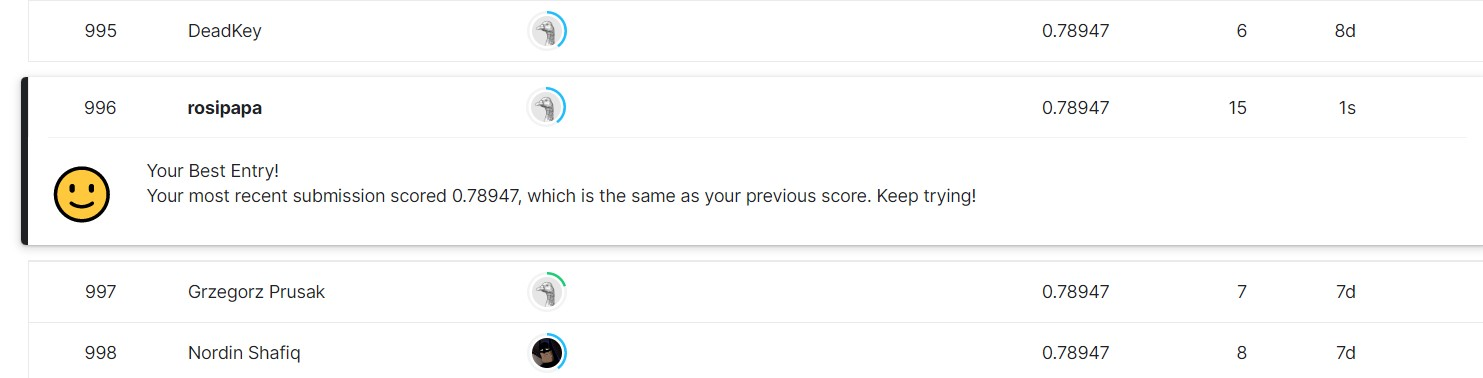